##  Data exploration

In [4]:
'''Data Exploration
Using the data set, audio files by plotting out the waveform and a spectrogram to see the sample audio files.'''
import librosa
import librosa.display
import numpy as np
import pandas as pd

import os
import sys
import glob
import numpy as np
import librosa
from scipy.io import wavfile

import matplotlib.pyplot as plt
import scipy.io.wavfile
import numpy as np
import sys


In [5]:
df = pd.read_csv('emotion_capstone_final_dataframe_Anuj_Goyal.csv')

In [6]:
df.shape

(2548, 42)

In [7]:
df = pd.DataFrame(data=df)

In [8]:
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,31,32,33,34,35,36,37,38,39,emotion
0,0,-601.810059,88.884186,-6.374287,18.134838,8.870049,-6.768386,-8.450768,-8.799085,0.974113,...,1.872431,-1.353514,-0.574241,-2.894040,-3.496557,-4.538796,-0.630775,1.481298,4.385191,happy
1,1,-580.550842,81.229492,4.069503,16.041086,9.465206,-2.829373,2.162840,-7.721000,-12.335378,...,-1.636269,-2.553348,-0.112663,-0.990992,-0.147064,-4.058964,-2.083461,-3.824978,-1.526536,neutral
2,2,-657.560120,59.446049,0.076748,0.355759,3.696810,-2.486271,-10.530478,-12.251342,-11.966130,...,3.418365,0.946545,5.915897,3.258476,4.394576,1.344280,2.951471,-0.636108,5.266712,neutral
3,3,-717.189331,80.454384,24.555910,28.019138,13.721040,13.116772,-1.496100,0.332898,-6.956304,...,-1.276201,0.383179,2.504234,-1.385384,1.908703,-4.068672,0.019233,-0.693188,1.878629,calm
4,4,-512.639526,44.646317,-16.786211,6.025928,-4.762635,-9.397833,-13.161016,-12.490952,-8.490343,...,-0.946090,-2.157158,1.024922,-2.708724,0.514241,0.157954,0.704668,-0.448766,3.384558,happy


In [9]:
df.set_index('Unnamed: 0')

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,emotion
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,-601.810059,88.884186,-6.374287,18.134838,8.870049,-6.768386,-8.450768,-8.799085,0.974113,-1.865388,...,1.872431,-1.353514,-0.574241,-2.894040,-3.496557,-4.538796,-0.630775,1.481298,4.385191,happy
1,-580.550842,81.229492,4.069503,16.041086,9.465206,-2.829373,2.162840,-7.721000,-12.335378,-0.727898,...,-1.636269,-2.553348,-0.112663,-0.990992,-0.147064,-4.058964,-2.083461,-3.824978,-1.526536,neutral
2,-657.560120,59.446049,0.076748,0.355759,3.696810,-2.486271,-10.530478,-12.251342,-11.966130,-0.170083,...,3.418365,0.946545,5.915897,3.258476,4.394576,1.344280,2.951471,-0.636108,5.266712,neutral
3,-717.189331,80.454384,24.555910,28.019138,13.721040,13.116772,-1.496100,0.332898,-6.956304,3.412825,...,-1.276201,0.383179,2.504234,-1.385384,1.908703,-4.068672,0.019233,-0.693188,1.878629,calm
4,-512.639526,44.646317,-16.786211,6.025928,-4.762635,-9.397833,-13.161016,-12.490952,-8.490343,1.165121,...,-0.946090,-2.157158,1.024922,-2.708724,0.514241,0.157954,0.704668,-0.448766,3.384558,happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2543,-499.493408,98.790924,-7.152205,-15.300848,9.812354,10.909413,-17.505718,4.900040,-18.938875,0.618976,...,-0.486943,6.239402,11.535026,16.116652,16.744324,14.769562,10.338476,3.205269,3.537985,surprised
2544,-379.966522,72.917908,-20.747152,-10.147606,-17.334583,-2.216329,-12.134209,-0.430642,-14.723318,-7.018700,...,2.506236,6.185790,9.327741,7.754643,-0.065278,2.875055,5.191144,3.620840,3.276349,angry
2545,-433.188965,57.363720,4.908972,13.024332,-3.378766,-0.960907,-15.769564,4.778440,-14.686362,-8.497720,...,6.618637,6.445675,-1.611166,-1.723101,1.382977,4.430180,5.747354,-2.161624,3.657368,angry


<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

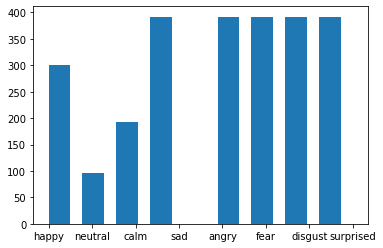

In [10]:
plt.figure()
plt.hist(df['emotion'], bins=9, width=0.5)
plt.figure

In [29]:
fd = os.getcwd()
fd

'C:\\Users\\Anuj'

** The csv was created by combining both the csvs RAVDESS & TESS

In [31]:
sample_file = 'capstoneproject-speech-emotion-machine-learning-master/RawData/Ravdess/Actor_01/03-01-01-01-01-01-01.wav'

In [32]:
#sample 
#librosa.core.load(path, sr=22050, mono=True, offset=0.5, duration=None, dtype=<class 'numpy.float32'>, res_type='kaiser_best')
res_type_s = 'kaiser_best'
duration_s = None
sample_rate_s = 22050
offset_s = 0.5

#Mfcc
#librosa.feature.mfcc(y=None, sr=22050, S=None, n_mfcc=20, dct_type=2, norm='ortho', lifter=0, **kwargs)
mfcc_sample_rate = 22050
n_feat = 13
n_mfcc = 40 #number of MFCCs to return => number of features
n_fft = 552
window = 0.4
test_shift = 0.1
duration = 2.5
axis_mfcc = 1 #axis =0 means along the columns and axis =1 along the row

In [33]:
#X = audio time series
#sample_rate = sampling rate of X

X,sample_rate = librosa.load(sample_file, 
                                  res_type = res_type_s,
                                  duration = duration_s,
                                  sr = sample_rate_s,
                                  offset = offset_s,
                                 mono=False)

print(X)
print(sample_rate)

[0. 0. 0. ... 0. 0. 0.]
22050


In [34]:
time = np.arange(0,len(X))/sample_rate
print(time) # prints timeline

[0.00000000e+00 4.53514739e-05 9.07029478e-05 ... 2.80317460e+00
 2.80321995e+00 2.80326531e+00]


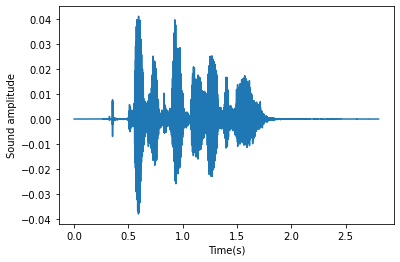

In [35]:
fig, ax = plt.subplots()
ax.plot(time,X)
ax.set(xlabel='Time(s)',ylabel='Sound amplitude')
plt.show()

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
///
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


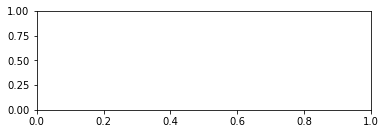

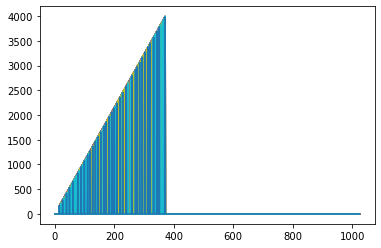

In [36]:
pitches, magnitudes = librosa.piptrack(y=X, sr=sample_rate)
print(pitches)
print('///')
print(magnitudes)
plt.subplot(212)
plt.show()
plt.plot(pitches)
plt.show()

Text(0.5, 1.0, 'Linear-frequency power spectrogram')

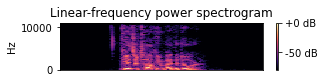

In [37]:
y, sr = librosa.load(sample_file)
plt.figure(figsize=(10, 4))

D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
plt.subplot(4, 2, 1)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

In [38]:
librosa_audio, librosa_sample_rate = librosa.load(sample_file)

mfccs = librosa.feature.mfcc(y=librosa_audio, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 143)


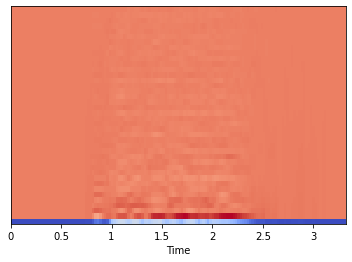

In [39]:
import librosa.display
librosa.display.specshow(mfccs, sr=librosa_sample_rate, x_axis='time')

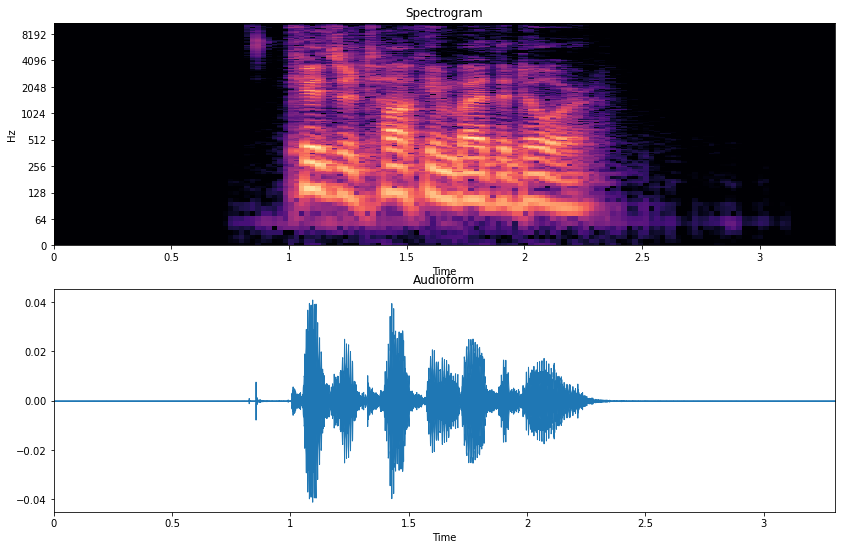

In [40]:
plt.figure(figsize=(14, 9))

plt.figure(1)

plt.subplot(211)
plt.title('Spectrogram')
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D, x_axis='time', y_axis='log')

plt.subplot(212)
plt.title('Audioform')
librosa.display.waveplot(y, sr=sr)

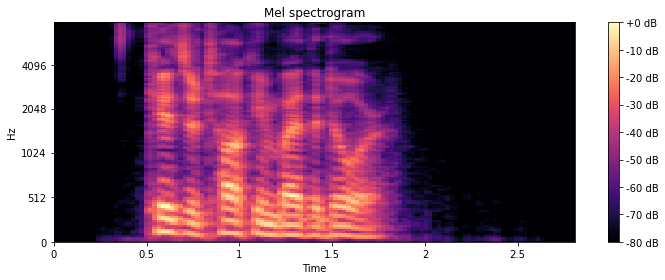

In [41]:
librosa.feature.melspectrogram(y=X, sr=sample_rate)

D = np.abs(librosa.stft(X))**2
S = librosa.feature.melspectrogram(S=D)
S = librosa.feature.melspectrogram(y=X, sr=sample_rate, n_mels=128,fmax=8000)
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S,ref=np.max),y_axis='mel', fmax=8000,x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()
plt.show()

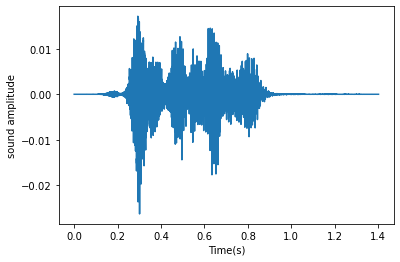

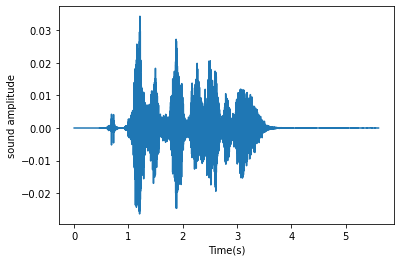

In [42]:
y_fast = librosa.effects.time_stretch(X, 2.0)
time = np.arange(0,len(y_fast))/sample_rate
fig, ax = plt.subplots()
ax.plot(time,y_fast)
ax.set(xlabel='Time(s)',ylabel='sound amplitude')
plt.show()#compress to be twice as fast

y_slow = librosa.effects.time_stretch(X, 0.5)
time = np.arange(0,len(y_slow))/sr
fig, ax = plt.subplots()
ax.plot(time,y_slow)
ax.set(xlabel='Time(s)',ylabel='sound amplitude')
plt.show()#half the original speed

In [43]:
S = np.abs(librosa.stft(X))
S

array([[2.39441088e-05, 2.06736568e-05, 1.06406942e-05, ...,
        1.05260755e-04, 1.82469885e-04, 6.62424718e-05],
       [1.93388109e-06, 2.16296012e-05, 1.70148105e-05, ...,
        1.22340978e-04, 1.92596752e-04, 7.88209290e-05],
       [1.78216924e-05, 2.16290264e-05, 9.34407853e-06, ...,
        1.01623955e-04, 2.24794043e-04, 1.07274056e-04],
       ...,
       [1.53039021e-08, 5.87567470e-08, 7.87372514e-08, ...,
        4.44538202e-08, 1.23720582e-07, 6.61171740e-08],
       [2.05001758e-08, 2.15476881e-08, 3.22811253e-08, ...,
        7.20374302e-08, 1.16945586e-07, 5.08142186e-08],
       [7.01882019e-09, 3.22608962e-09, 2.21636540e-08, ...,
        7.23087581e-08, 1.19589330e-07, 4.72565169e-08]], dtype=float32)

In [44]:
#lms = librosa.power_to_db(S)
#lms

log_S = librosa.amplitude_to_db(S, ref=np.max)

In [45]:
from librosa.core import istft
vocals = istft(log_S)

In [46]:
mfccs_test = librosa.feature.mfcc(y=vocals, sr = mfcc_sample_rate, n_mfcc = n_mfcc)
mfccs_test

array([[-820.71936, -820.71936, -820.71936, ..., -820.71936, -820.71936,
        -820.71936],
       [   0.     ,    0.     ,    0.     , ...,    0.     ,    0.     ,
           0.     ],
       [   0.     ,    0.     ,    0.     , ...,    0.     ,    0.     ,
           0.     ],
       ...,
       [   0.     ,    0.     ,    0.     , ...,    0.     ,    0.     ,
           0.     ],
       [   0.     ,    0.     ,    0.     , ...,    0.     ,    0.     ,
           0.     ],
       [   0.     ,    0.     ,    0.     , ...,    0.     ,    0.     ,
           0.     ]], dtype=float32)

In [47]:
mfccs_final = np.mean(mfccs_test,axis = axis_mfcc)
mfccs_final

array([-3.5244244e+02,  5.2154869e+01,  2.4526415e+01,  1.9350706e+01,
        9.5548840e+00,  8.1919909e+00,  5.0594893e+00,  5.5200944e+00,
       -3.7734466e+00,  3.0006790e+00,  2.2188449e+00,  4.6282411e+00,
        4.6202250e+00,  1.4075327e+00,  3.6938314e+00,  1.0245121e+00,
       -2.4914300e+00,  7.8680164e-01, -1.6272802e+00,  2.0821781e+00,
       -4.3306007e+00,  7.1059823e-02, -2.4611518e+00,  1.1290132e+00,
       -3.9294454e-01,  7.4487555e-01, -2.4801211e+00,  1.1374093e+00,
        5.8356941e-01,  3.7003531e+00,  1.9530036e-01,  1.4604956e+00,
       -1.4826000e+00,  2.3033614e+00,  9.0139002e-01,  3.7016410e-01,
       -1.5354273e+00,  3.7660947e-01, -9.0219378e-01,  1.4310418e+00],
      dtype=float32)

In [48]:
S = np.abs(librosa.stft(X))
lms = librosa.power_to_db(S**2)
    #lms = librosa.amplitude_to_db(librosa.feature.melspectrogram(y=X,sr=sample_rate))
vocal = istft(lms)    #convert them back to an audio sample using inverse STFT.
mfccs = np.mean(librosa.feature.mfcc(y=vocal, 
                                     sr = mfcc_sample_rate, 
                                     n_mfcc = n_mfcc),
                                     axis = axis_mfcc)


In [49]:
sample_rate = np.array(sample_rate)
sample_rate

array(22050)

In [50]:
print(f"n_mfcc = {n_mfcc}")
print(f"sr = {mfcc_sample_rate}")

z = librosa.feature.mfcc(X, sr = mfcc_sample_rate, n_mfcc = n_mfcc)
for x in z:
    print(x)

n_mfcc = 40
sr = 22050
[-860.1528  -860.1528  -860.1528  -860.1528  -860.1528  -860.1528
 -860.1528  -860.1528  -860.1528  -860.1528  -857.1677  -854.7785
 -854.8237  -842.0672  -784.79193 -747.00494 -758.9482  -815.80786
 -830.10236 -816.85986 -794.002   -556.11145 -472.75116 -448.4099
 -403.3617  -392.71237 -394.13153 -415.3095  -462.08987 -458.12164
 -415.30377 -386.66003 -395.7879  -426.69672 -513.3673  -475.92633
 -446.09253 -462.06235 -454.67352 -422.0556  -415.98483 -406.72818
 -395.14957 -435.26456 -501.72903 -515.6548  -487.4705  -448.9137
 -447.70984 -480.4195  -524.86414 -556.2629  -524.1148  -452.46356
 -426.71432 -419.88858 -420.25104 -457.13513 -542.29767 -533.29895
 -471.14053 -477.2549  -557.8843  -537.82153 -471.7906  -465.0916
 -476.62863 -493.01965 -507.16095 -516.50653 -513.30615 -521.2161
 -541.8383  -561.5157  -581.97266 -620.3027  -656.598   -676.2011
 -691.8276  -709.51483 -746.84357 -781.9214  -800.78815 -824.28656
 -830.8932  -833.2169  -828.39984 -836.5567  -

In [51]:
mfccs = np.mean(z, axis=1)
mfccs

array([-6.7043011e+02,  6.5463234e+01,  4.8822185e-01,  1.5117002e+01,
        8.7833881e+00,  1.0563951e+00, -4.2406769e+00, -3.1930439e+00,
       -1.3346264e+01, -2.9177351e+00,  5.3375721e-01, -3.2262833e+00,
        2.0105293e+00, -4.0300112e+00,  1.9380878e-01,  1.2353790e+00,
       -5.1382542e+00, -1.7780107e+00, -1.9244382e+00, -7.4367231e-01,
       -7.3666177e+00, -3.3326349e-01, -3.0078795e+00, -5.0382442e+00,
       -2.2274773e+00, -6.9816214e-01, -5.9582076e+00,  5.5907118e-01,
       -2.7585127e+00,  3.8554946e-01, -2.5434520e+00, -2.3236392e+00,
       -3.3210135e+00, -2.0330336e+00, -3.9490018e+00, -1.6773354e+00,
       -1.3858986e+00, -2.0310068e+00, -4.2552681e+00, -1.6869317e+00],
      dtype=float32)

(0.0, 1.0, 40.0, 0.0)

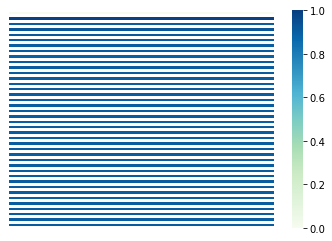

In [52]:
import numpy as np
import seaborn as sns
# Put this into a heatmap
_min = np.amin(mfccs)
_max = np.amax(mfccs)
mfcc = (mfccs - _min) / (_max - _min)



plt.figure(figsize = (6,4))
sns.heatmap(mfcc[:, np.newaxis], cmap='GnBu', linewidth =2)
#sns.heatmap(mfcc, cmap = 'RGBA', linewidth = 1)
plt.axis('off')

In [53]:
y,sr = librosa.load(sample_file)
print(librosa.get_duration(filename=sample_file))
print(librosa.get_duration(y=y,sr=sr))

3.3032916666666665
3.3033106575963718
